## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
%matplotlib inline

import pandas as pd
import seaborn as sns
import scipy.stats as stats
import statsmodels
import numpy as np

sns.set_style('white')

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


### Is the distribution of body temperatures normal?

NormaltestResult(statistic=2.7038014333192031, pvalue=0.2587479863488254)
130


/Users/ro.d.bruijn/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


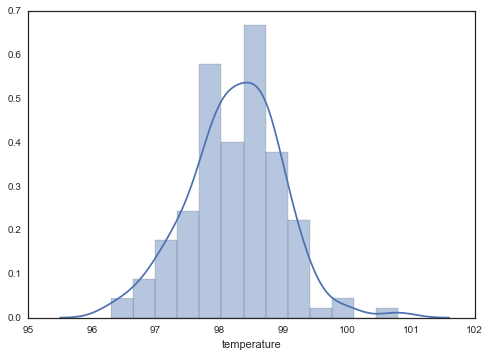

In [4]:
print(stats.normaltest(df.temperature))
print(len(df.temperature)) # nr of samples 
sns.distplot(df.temperature)

# yes it's normally distributed (pvalue > 0.05)
# Also distribution looks bellshaped (not skewed)
# Sample size bigger than 30

### Is the true population mean really 98.6 degrees F?

In [5]:
# T-test
print(df.temperature.mean()) # measured mean
stats.ttest_1samp(df.temperature, 98.6)

# not the true population mean, pvalue<0.05

98.2492307692


Ttest_1sampResult(statistic=-5.4548232923645195, pvalue=2.4106320415561276e-07)

In [6]:
# Z-test (can't find a package)
print((df.temperature.mean() - 98.6) / (df.temperature.std() / np.sqrt(len(df.temperature))))
# Table does not go to 5, hence biggest probability for Z 3.09 is 0.999
print(1 - 0.999) # P-value actually even smaller than that number, so p-value<0.05 aka H0 can be rejected. 
# Not the true population mean

# In practice doesn't matter whether you use T-test or Z-test, both reject H0. Officially you should use the Z-test.

-5.45482329236
0.0010000000000000009


### At what temperature should we consider someone's temperature to be "abnormal"?

In [7]:
# 95% confidence interval
print(np.percentile(df.temperature, [2.5, 97.5]))
# Below the first number and above the second number

[ 96.7225  99.4775]


In [8]:
# margin of error
np.percentile(df.temperature, [2.5, 97.5])[1] - df.temperature.mean()
# margin of error is 1.23 Fahrenheit.

1.2282692307692571

### Is there a significant difference between males and females in normal temperature?

In [9]:
from scipy.stats import ttest_ind

print(len(df[df.gender == 'M'].temperature))
ttest_ind(df[df.gender == 'M'].temperature, df[df.gender == 'F'].temperature)
# Can't find a package, so using T-test instead, similar results with these sample sizes.
# P-value < 0.05, hence significant difference between males and femaled normal temperature.

65


Ttest_indResult(statistic=-2.2854345381656103, pvalue=0.023931883122395609)